In [1]:
def gtcReadHist():
    
    import numpy as np 

    dat = open('history.out','r').readlines()
    
    ndstep = int(dat[0])     # of time steps
    nspecies = int(dat[1])   # of particle species
    mpdiag = int(dat[2])     # of diagnostics per particle
    nfield = int(dat[3])     # of pertubed fields
    modes = int(dat[4])      # of modes per perturbed field
    mfdiag = int(dat[5])     # of diagnostics per field
    tstep = float(dat[6])    # of time step size

    #print important parameters for reference
    print("tsteps,","# species,", "# particle diagnostics,", "# fields,", "# modes,", "# field quantities,", "tstep size")
    print(ndstep, nspecies, mpdiag, nfield, modes, mfdiag, tstep)

    del dat[0:7] # Remove first 7 values for cleaner array

    #convert dat to float
    for i in range(0,len(dat)-1):
        dat[i]=float(dat[i])

    # initialize class array
    hdat=[]

    # store data into list of lists, hdat
    for i in range(0,ndstep):
        hdat.append(dat[80*i:80*(i+1)])
    
    # initialize history data arrays  
    partdata = np.zeros((ndstep,mpdiag,nspecies))
    fieldhist = np.zeros((ndstep,mfdiag,nfield))
    fieldmode = np.zeros((ndstep,2,modes,nfield))

              
    #get data into data arrays
    for i in range(0,ndstep):
        for n in range(0,nspecies):
            partdata[i,:,n]=hdat[i][mpdiag*n:mpdiag*(n+1)]
        for n in range(0,nfield):
            fieldhist[i,:,n]=hdat[i][(mpdiag*nspecies)+mfdiag*n:(mpdiag*nspecies)+mfdiag*(n+1)]
            for m in range(0,2):
                fieldmode[i,m,:,n]=hdat[i][(mpdiag*nspecies)+(mfdiag*nfield)+modes*(2*n+m):(mpdiag*nspecies)+(mfdiag*nfield)+modes*(2*n+m+1)]

    return partdata,fieldhist,fieldmode


In [2]:
h = gtcReadHist();

tsteps, # species, # particle diagnostics, # fields, # modes, # field quantities, tstep size
4000 2 10 3 8 4 3.49431


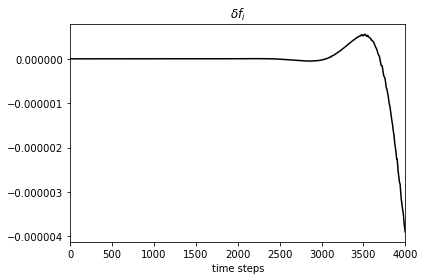

In [7]:
import matplotlib.pyplot as plt

plt.plot(h[2][:,1,0,0],'-k')
plt.show()
plt.xlim([1,len(h[0][:,0,0])]);
plt.xlabel('time steps');
plt.title('$\delta f_i$');
